In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.3
Sklearn  0.24.1


In [2]:
DATA_PATH = "../../Datasets/Tabular/titanic/"

In [3]:
df      = pd.read_csv(DATA_PATH + "train.csv", index_col='PassengerId')
df_test = pd.read_csv(DATA_PATH + "test.csv",  index_col='PassengerId')

print("Train DataFrame:", df.shape)
print("Test DataFrame: ", df_test.shape)

Train DataFrame: (891, 11)
Test DataFrame:  (418, 10)


In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Feat Eng

# FE 1: Title

In [11]:
df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [12]:
get_Title_from_Name = lambda name: name.split(',')[1].split('.')[0].strip()

df['Title']      = df['Name'].map(get_Title_from_Name)
df_test['Title'] = df_test['Name'].map(get_Title_from_Name)

In [13]:
df['Title']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 891, dtype: object

In [14]:
title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [15]:
df['Title']      = df.Title.map(title_dictionary)
df_test['Title'] = df_test.Title.map(title_dictionary)

In [16]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Officer
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss


## FE 2

In [19]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
F33            3
              ..
D28            1
C148           1
C70            1
D15            1
B19            1
Name: Cabin, Length: 147, dtype: int64

In [29]:
#Turning cabin number into Deck

df['Deck'] = df['Cabin'].str[0]

In [38]:
df['Deck'].isna().sum() / len(df)

0.7710437710437711

## FE 3

In [39]:
df['Family_Size']=df['SibSp']+df['Parch']

In [41]:
df['Family_Size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Size, dtype: int64

# FE4

In [43]:
df['Age*Class']=df['Age']*df['Pclass']

In [45]:
df['Survived']

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [44]:
df['Age*Class']

PassengerId
1       66.0
2       38.0
3       78.0
4       35.0
5      105.0
       ...  
887     54.0
888     19.0
889      NaN
890     26.0
891     96.0
Name: Age*Class, Length: 891, dtype: float64

In [53]:
df['Pclass']

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64

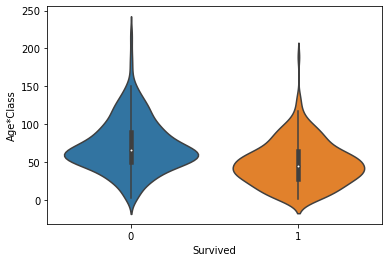

In [50]:
sb.violinplot(x="Survived", y="Age*Class", data=df);

In [54]:
df['Fare_Per_Person'] = df['Fare']/(df['Family_Size']+1)

# Train

In [68]:
cat_vars  = ['Sex', 'Embarked', 'Title', "Deck"]         
num_vars  = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', "Family_Size", "Age*Class", "Fare_Per_Person"]

print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


x = df[num_vars + cat_vars]
y = df.Survived


Numerical features:
 ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Family_Size', 'Age*Class', 'Fare_Per_Person']

Categorical features:
 ['Sex', 'Embarked', 'Title', 'Deck']


In [63]:
### BEGIN SOLUTION
num_4_treeModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value=-9999, add_indicator=True)),
])

cat_4_treeModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', preprocessing.OrdinalEncoder(handle_unknown='ignore')) # handle_unknown='ignore' ONLY IN VERSION 0.24
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_treeModels, num_vars),
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars
tree_prepro


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                fill_value=-9999,
                                                                strategy='constant'))]),
                                 ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age',
                                  'Family_Size', 'Age*Class',
                                  'Fare_Per_Person']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Title', 'Deck'])])

In [58]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

# tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}


In [64]:
pipe = pipeline.make_pipeline(tree_prepro, LGBMClassifier())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value=-9999,
                                                                                 strategy='constant'))]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age', 'Family_Size',
                                                   'Age*Class',
                                                   'Fare_Per_Person']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked', 'Title',
                                                   'Deck'])])),
                ('lgbmclassifier', LGBMClassifier())])

In [94]:
experimets = {
 
    PREPRO + RF + RF_HParams,
    PREPRO + LGBM + LGBM_HParams,   
}
    
    
    
num_leaves = [2....50]
learning_rate = [0.00001, 0.1] # Log scale

LGBMClassifier() # Grid , Random, BAyes Opt (Optuna packafe)

Pipeline(steps=[('prepr',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value=-9999,
                                                                                 strategy='constant'))]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age', 'Family_Size',
                                                   'Age*Class',
                                                   'Fare_Per_Person']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked', 'Title',
                                                   'Deck'])])),
                ('model', LGBMClassifier())])

In [98]:
pipe["model"]

LGBMClassifier()

In [69]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    x, y,
    test_size=0.2,
    stratify = y,   # ALWAYS RECOMMENDED FOR BETTER VALIDATION
    random_state=0  # Recommended for reproducibility
)

In [88]:
all_pred = model_selection.cross_val_predict(pipe2, x, y, cv=50)

In [89]:
all_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [70]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value=-9999,
                                                                                 strategy='constant'))]),
                                                  ['Pclass', 'SibSp', 'Parch',
                                                   'Fare', 'Age', 'Family_Size',
                                                   'Age*Class',
                                                   'Fare_Per_Person']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked', 'Title',
                                                   'Deck'])])),
                ('lgbmclassifier', LGBMClassifier())])

In [93]:
pipe[1]

LGBMClassifier()

In [75]:
fi = pipe[1].feature_importances_
fi

array([ 44,  53,  19, 624, 669,  62, 435, 497,   4,   0,  81,  67, 102,
        69], dtype=int32)

In [79]:
x.columns.values.tolist()

['Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Age',
 'Family_Size',
 'Age*Class',
 'Fare_Per_Person',
 'Sex',
 'Embarked',
 'Title',
 'Deck']

In [80]:
feature_imp = pd.DataFrame(sorted(zip(fi, x.columns.values.tolist())), columns=['Value','Feature'])
feature_imp

,Value,Feature
0,0,Embarked
1,4,Sex
2,19,Parch
3,44,Pclass
4,53,SibSp
5,62,Family_Size
6,67,Deck
7,81,Title
8,435,Age*Class
9,497,Fare_Per_Person


In [83]:
from sklearn.inspection import permutation_importance
r = permutation_importance(pipe, x_val, y_val, n_repeats=30, random_state=0)


In [85]:
sorted_idx = r.importances_mean.argsort()
sorted_idx

array([ 4,  9,  3, 11,  1,  2,  5,  7,  6,  0, 10,  8])

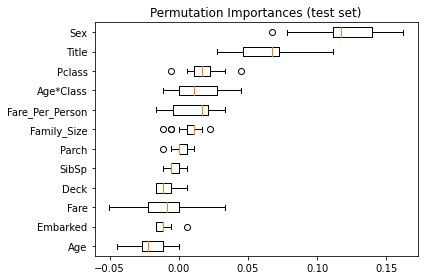

In [86]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()